# Проект "Телеком — Поиск клиента с неоптимальными тарифами".

**Задача:**

Найти клиентов, которые:

а) переплачивают на текущих тарифах;

б) сэкономят, если перейдут на более дорогой тариф.

Используйте правила формирования тарифов:
    
Ежемесячная плата за тариф:
    
* Тариф А — 4000 ₽,
* Тариф B — 2000 ₽,
* Тариф С — 1000 ₽.

Дополнительная ежемесячная плата за каждого оператора:
* Тариф А — 50 ₽,
* Тариф B — 150 ₽,
* Тариф С — 300 ₽.

Входящие и внутренние звонки — бесплатны на всех тарифах,

Исходящие звонки, внутри сети, включённыев тариф:
* Тариф А — 2000 минут,
* Тариф B — 500 минут,
* Тариф С — нет.

Цена сверх лимита:
* A — 0.1 ₽/мин.,
* B — 0.15 ₽/мин.,
* C — 0.3 ₽/мин.

Исходящие звонки, кроме внутренних:
* A — 0.3 ₽/мин.,
* B — 0.5 ₽/мин.,
* C — 0.7 ₽/мин.


1 Проведите исследовательский анализ данных

2 Найдите клиентов с неоптимальными тарифами
Ищите только по активным клиентам.
Предложите решение: как уменьшить риск падения выручки, если все
клиенты перейдут на более выгодные тарифы?

3 Проверьте статистические гипотезы

a. Проверьте гипотезу: цена услуг различается на тарифных планах A и B.

b. Сформулируйте собственную статистическую гипотезу. Дополните её
нулевой и альтернативной гипотезами. Проверьте гипотезу с помощью
статистического теста.

**Описание данных:**
    
Датасеты описывают использование услуг «Нупозвони» — провайдера виртуальной телефонии. Его клиенты — колл-центры, которые:
распределяют входящие вызовы на операторов, совершают исходящие вызовы силами операторов. Также операторы могут делать внутренние вызовы — вызовы друг между другом
внутри сети виртуальной телефонии.

Датасет /datasets/telecom_dataset.csv

Колонки:
* user_id — идентификатор клиента;
* date — дата статистики;
* direction — направление вызовов: out — исходящий вызов, in — входящий;
* internal — маркер внутренних и внешних вызовов;
* operator_id — идентификатор оператора;
* is_missed_call — маркер пропущенных вызовов;
* calls_count — количество звонков;
* call_duration — длительность звонка без учёта времени ожидания;
* total_call_duration — длительность звонка с учётом времени ожидания.

Датасет /datasets/telecom_clients.csv

Колонки:
* user_id — идентификатор клиента;
* tariff_plan — тарифный план клиента;
* date_start — дата регистрации клиента в сервисе.

По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию
нужно обязательно в формате pdf, прикрепив ссылку на файл в основном проекте.

**Декомпозиция**

1. Предобработка данных
* Загрузка данных и изучение общей информации.
* Проверка и корректировка названий столбцов.
* Проверка пропусков. Заполнение или удаление, при необходимости.
* Проверка типов данных. Изменение, при необходимости.
* Проверка и удаление дубликатов.
* Проверка временного периода данных.
2. Исследовательский анализ данных
* Исследавание распределения звонков по датам. Определим активный период исследования, в котором еженедельное количество звонков было выше среднего.
* Исследование распределения направления вызовов
* Исследование распределения внутренних и внешних вызовов
* Исследование распределения вызовов по операторам
* Исследование распределения пропущенных вызовов
* Исследование распределения длительности вызовов с учётом времени ожидания
* Исследование распределения клиентов по тарифным планам. Принять решение об активных пользователях.

3. Анализ экономических показателей.
* Исследование расходов клиентов на каждом из тарифов
* Исследование клиентов с неоптимальными тарифными планами.
4. Проверка статистических гипотез
* Проверка гипотезы: затраты клиентов различаются на тарифных планах A и B.
* Проверка гипотезы: Доходы заказчика изменятся при переводе клиентов на оптимальные тарифные планы.
5. Выводы и рекомендации


## Предобработка данных

### Загрузка данных и изучение общей информации.

Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

Загружаем данные

In [2]:
clients = pd.read_csv('/datasets/telecom_clients.csv')
data = pd.read_csv('/datasets/telecom_dataset.csv')

In [3]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [5]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [6]:
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


Названия столбцов изменять не требуется.

### Проверка пропусков.

In [7]:
clients.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [8]:
data.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Найдены пропуски в столбце 'internal' 117 шт. и в столбце 'operator_id' 8172 шт.

Посмотрим на пропуски в столбце 'internal'.

In [9]:
data.loc[data['internal'].isna()].head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1007,166405,2019-09-18 00:00:00+03:00,in,NaN,NaN,True,1,0,59
1090,166405,2019-10-01 00:00:00+03:00,in,NaN,NaN,True,1,0,1
1864,166406,2019-08-20 00:00:00+03:00,in,NaN,NaN,True,1,0,36
1924,166406,2019-09-02 00:00:00+03:00,in,NaN,879898.0,False,1,2,9
6210,166541,2019-09-26 00:00:00+03:00,in,NaN,908960.0,False,1,393,423


Проверим, есть ли исходящие звонки с пропусками в столбце 'internal'.

In [10]:
data.loc[data['internal'].isna()].query('direction == "out"')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
21004,167016,2019-10-23 00:00:00+03:00,out,NaN,NaN,True,3,0,196
51367,168291,2019-11-28 00:00:00+03:00,out,NaN,NaN,True,3,0,93


Возможно все входящие вызовы являются внутрисетевыми. Проверим.

In [11]:
data.query('direction == "in" and internal == False')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24
26,166377,2019-08-12 00:00:00+03:00,in,False,880028.0,False,1,407,411
...,...,...,...,...,...,...,...,...,...
53889,168603,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,30
53891,168606,2019-11-08 00:00:00+03:00,in,False,957922.0,True,1,0,7
53893,168606,2019-11-08 00:00:00+03:00,in,False,NaN,True,6,0,121
53894,168606,2019-11-08 00:00:00+03:00,in,False,957922.0,False,2,686,705


Т.к. в столбце "internal" определить корректные значения не представляется возможным, то заменяем пропуски на False, как более распространенное значение.

In [12]:
data['internal'] = data['internal'].fillna('False')

Посмотрим на пропуски в столбце 'operator_id'.

In [13]:
data.loc[data['operator_id'].isna()].head(15)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
30,166377,2019-08-13 00:00:00+03:00,in,False,NaN,True,7,0,128
38,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3
45,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3
77,166377,2019-08-22 00:00:00+03:00,in,False,NaN,True,1,0,1


In [14]:
print('Количество пропусков в столбце "operator_id"',len(data.loc[data['operator_id'].isna()]), 'шт.')

Количество пропусков в столбце "operator_id" 8172 шт.


In [15]:
print('Доля пропусков в столбце "operator_id"', round(len(data.loc[data['operator_id'].isna()])/len(data)*100,1), '%.')

Доля пропусков в столбце "operator_id" 15.2 %.


Проверим данные каких клиентов имеют пропуски.

In [16]:
data_na = data.loc[data['operator_id'].isna()]

In [17]:
data_na.groupby('user_id')['user_id'].count()

user_id
166377     41
166391     14
166392     54
166399     12
166405    122
         ... 
168583     12
168598     14
168601     17
168603      1
168606      2
Name: user_id, Length: 305, dtype: int64

Т.к доля пропусков в столбце "operator_id" значительная и удалить их нельзя, заменяем пропуски в столбце 'operator_id' на '-1'.

In [18]:
data['operator_id'] = data['operator_id'].fillna(-1)

Проверяем повторно на пропуски.

In [19]:
data.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

### Проверка типов данных.

In [20]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


Меняем тип данных столбца date_start на временной.

In [21]:
clients['date_start'] = pd.to_datetime(clients['date_start'])

Проверяем.

In [22]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53902 non-null  object 
 4   operator_id          53902 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


Меняем тип данных столбца 'date' на временной.

In [24]:
data['date'] = pd.to_datetime(data['date'])

Меняем тип данных столбца 'internal' на логический.

In [25]:
data['internal'] = data['internal'].astype('bool')

Меняем тип данных столбца 'operator_id' на целочисленный.

In [26]:
data['operator_id'] = data['operator_id'].astype('int')

Проверяем.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53902 non-null  bool                                 
 4   operator_id          53902 non-null  int64                                
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

### Проверка и удаление дубликатов.

In [28]:
clients.duplicated().sum()

0

In [29]:
data.duplicated().sum()

4900

In [30]:
data[data.duplicated()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020,True,8,0,50
28,166377,2019-08-12 00:00:00+03:00,in,False,-1,True,2,0,34
44,166377,2019-08-14 00:00:00+03:00,out,False,880026,False,10,1567,1654
45,166377,2019-08-14 00:00:00+03:00,in,False,-1,True,1,0,3
51,166377,2019-08-15 00:00:00+03:00,out,False,880026,False,11,1413,1473
...,...,...,...,...,...,...,...,...,...
53869,168601,2019-11-25 00:00:00+03:00,in,False,952914,False,7,1229,1282
53874,168601,2019-11-26 00:00:00+03:00,in,False,952914,False,4,539,562
53875,168601,2019-11-26 00:00:00+03:00,in,False,-1,True,3,0,35
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118,True,3,0,89


In [31]:
data.query('user_id == 168603').sort_values(by=['user_id','date','operator_id'], ascending=False).head(15)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
53889,168603,2019-11-28 00:00:00+03:00,in,False,-1,True,1,0,30
53888,168603,2019-11-27 00:00:00+03:00,out,False,959118,False,1,76,99
53886,168603,2019-11-21 00:00:00+03:00,out,False,959118,True,1,0,10
53887,168603,2019-11-21 00:00:00+03:00,out,False,959118,False,5,338,423
53883,168603,2019-11-20 00:00:00+03:00,out,False,959118,True,3,0,89
53884,168603,2019-11-20 00:00:00+03:00,out,False,959118,False,3,419,478
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118,True,3,0,89
53882,168603,2019-11-12 00:00:00+03:00,out,False,959118,False,1,72,88


Строки 53883 и 53885 - явные дубликаты. Принимаем решение об удалении дубликатов.

In [32]:
data = data.drop_duplicates().reset_index(drop=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49002 entries, 0 to 49001
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              49002 non-null  int64                                
 1   date                 49002 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            49002 non-null  object                               
 3   internal             49002 non-null  bool                                 
 4   operator_id          49002 non-null  int64                                
 5   is_missed_call       49002 non-null  bool                                 
 6   calls_count          49002 non-null  int64                                
 7   call_duration        49002 non-null  int64                                
 8   total_call_duration  49002 non-null  int64                                
dtypes: bool

После удаления дубликатов в датафрейме 'data' осталось 49002 строки.

### Проверка временного периода данных.

In [34]:
print('Минимальная и максимальная дата звонков:',data['date'].min(),',',data['date'].max())

Минимальная и максимальная дата звонков: 2019-08-02 00:00:00+03:00 , 2019-11-28 00:00:00+03:00


In [35]:
print('Минимальная и максимальная дата подключения тарифа:',clients['date_start'].min(),',',clients['date_start'].max())

Минимальная и максимальная дата подключения тарифа: 2019-08-01 00:00:00 , 2019-10-31 00:00:00


**Выводы и наблюдения:**
* Были изучены данные в датасетах telecom_clients.csv и telecom_dataset.csv. Количество строк в telecom_dataset.csv 53902, в telecom_clients.csv 732.
* В датасете telecom_dataset.csv были обнаружены пропуски в столбцах 'operator_id' и 'internal'. 
* В столбце "operator_id" 8172 пропуска или 15.2% от количества строк. Определить корректные значения не представляется возможным, поэтому принято решение заменить пропуски на '-1'.
* В столбце "internal" 117 пропусков. Определить корректные значения не представляется возможным, поэтому принято решение заменить пропуски на 'unknown'.
* Тип данных столбца 'date_start' был замен на временной.
* Тип данных столбца 'date' был замен на временной.
* Тип данных столбца 'operator_id' был заменен на целочисленный.
* Тип данных столбца 'internal' был замен на логический.
* В датасете telecom_dataset.csv было обнаружено и удалено 4900 дубликатов. После удаления осталось 49002 строки.
* В датасете telecom_dataset.csv находятся данные за период с 2019-08-02 по 2019-11-28.
* В датасете clients_dataset.csv находятся данные за период с 2019-08-01 по 2019-10-31.


## Исследовательский анализ данных

Добавим столбец с номером месяца

In [36]:
data['month'] = data['date'].dt.month

In [37]:
clients['month'] = clients['date_start'].dt.month

Добавим столбец с номером недели

In [38]:
data['week'] = data['date'].dt.isocalendar().week

In [39]:
clients['week'] = clients['date_start'].dt.isocalendar().week

In [40]:
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month,week
0,166377,2019-08-04 00:00:00+03:00,in,False,-1,True,2,0,4,8,31
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,8,32
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,8,32
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8,32
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,8,32


In [41]:
clients.head()

,user_id,tariff_plan,date_start,month,week
0,166713,A,2019-08-15,8,33
1,166901,A,2019-08-23,8,34
2,168527,A,2019-10-29,10,44
3,167097,A,2019-09-01,9,35
4,168193,A,2019-10-16,10,42


### Исследование распределения звонков по датам

In [42]:
calls_by_month = data.pivot_table(index='month', values='calls_count', aggfunc='sum')
calls_by_month

,calls_count
month,
8,37391
9,146590
10,316299
11,306429


In [43]:
calls_by_week = data.pivot_table(index='week', values='calls_count', aggfunc='sum')
calls_by_week

,calls_count
week,
31,56
32,1358
33,8013
34,12067
35,16484
36,23751
37,28061
38,30192
39,53543


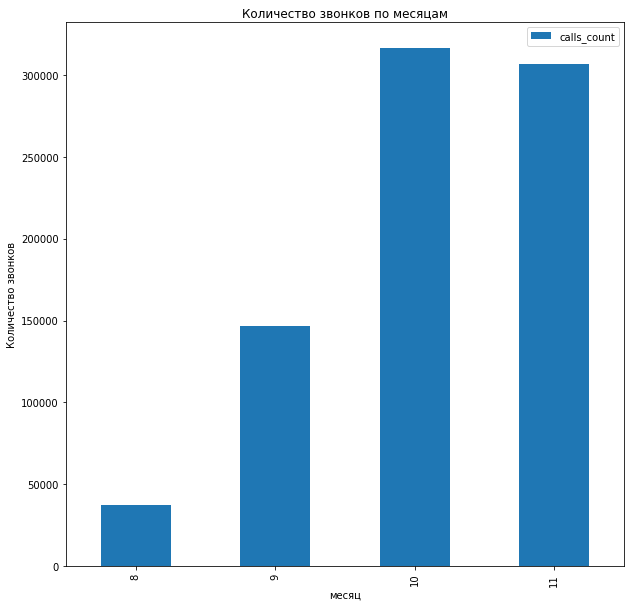

In [44]:
calls_by_month.plot(kind='bar',figsize=(10, 10))
plt.title('Количество звонков по месяцам')
plt.ylabel('Количество звонков')
plt.xlabel('месяц')
plt.show()

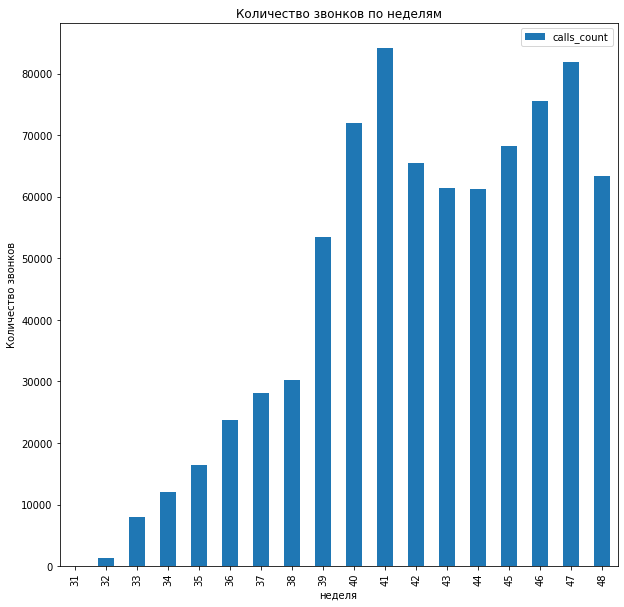

In [45]:
calls_by_week.plot(kind='bar',figsize=(10, 10))
plt.title('Количество звонков по неделям')
plt.ylabel('Количество звонков')
plt.xlabel('неделя')
plt.show()

Как видно на диаграмме резкий скачок количества звонков выше среднего количества произошел на 39 неделе (после 23.09.2019). Самое большое количество звонков было на 41-й и 47-й неделях. Между ними наблюдался спад с минимумами на 43-44 неделями. Исследование будем проводить по всем данным.

### Исследование распределения направления вызовов

In [46]:
calls_by_directions = data.pivot_table(index=('month','week','direction'), values='calls_count', aggfunc='sum')
calls_by_directions

calls_count
month week direction             
8     31   in                   7
           out                 49
      32   in                 145
           out               1213
      33   in                 635
           out               7378
      34   in                1394
           out              10673
      35   in                2230
           out              13667
9     35   in                 126
           out                461
      36   in                3315
           out              20436
      37   in                3813
           out              24248
      38   in                4856
           out              25336
      39   in                9086
           out              44457
      40   in                2455
           out               8001
10    40   in               14551
           out              46995
      41   in               20581
           out              63518
      42   in               17078
           out              48341
      43   in               13835
           out              47676
      44   in               12340
           out              31384
11    44   in                5034
           out              12480
      45   in               19998
           out              48182
      46   in               21389
           out              54106
      47   in               23459
           out              58412
      48   in               21518
           out              41851

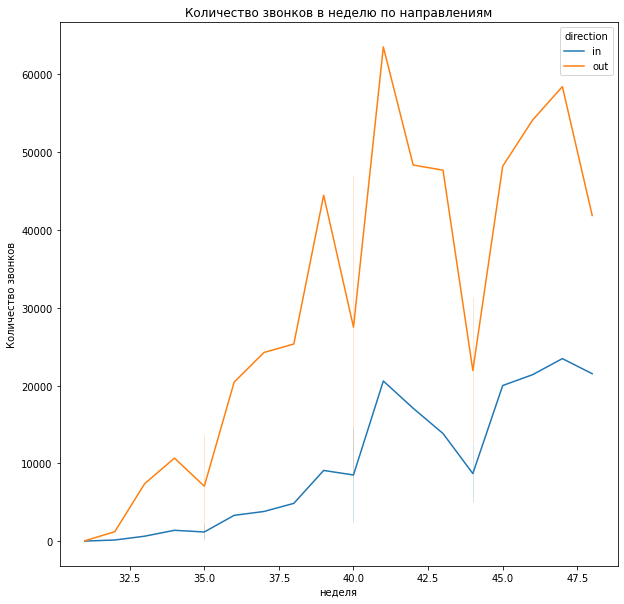

In [47]:
plt.figure(figsize=(10,10))
sns.lineplot(x='week',y='calls_count', hue='direction', data=calls_by_directions)
plt.title('Количество звонков в неделю по направлениям')
plt.xlabel('неделя')
plt.ylabel('Количество звонков')
plt.show()

На диаграмме видно, что входящих звонков меньше в 3-4 раза.

### Исследование распределения внутренних и внешних вызовов

In [48]:
calls_by_internal = data.pivot_table(index=('week','internal'), values='calls_count', aggfunc='sum').reset_index()
calls_by_internal.loc[calls_by_internal['internal'] == False, 'internal'] = 'External'
calls_by_internal.loc[calls_by_internal['internal'] == True, 'internal'] = 'Internal'
calls_by_internal

,week,internal,calls_count
0,31,External,50
1,31,Internal,6
2,32,External,1320
3,32,Internal,38
4,33,External,7962
5,33,Internal,51
6,34,External,12035
7,34,Internal,32
8,35,External,16310
9,35,Internal,174


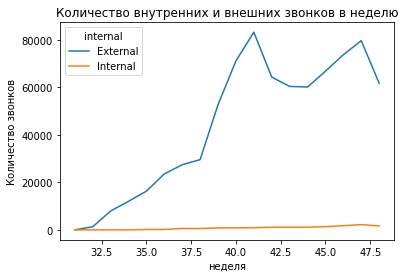

In [49]:

sns.lineplot(x='week',y='calls_count', hue='internal', data=calls_by_internal)
plt.title('Количество внутренних и внешних звонков в неделю')
plt.xlabel('неделя')
plt.ylabel('Количество звонков')
plt.show()

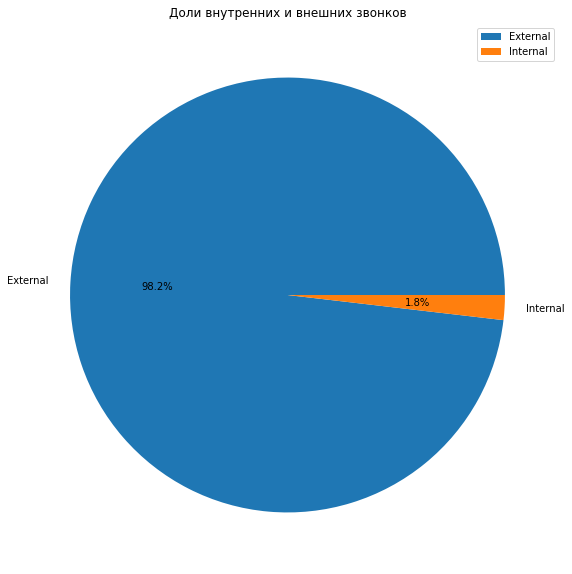

In [50]:
calls_by_internal.groupby(['internal']).sum().plot(kind='pie', y='calls_count', figsize=(10, 10), autopct='%1.1f%%', ylabel = '')
plt.title('Доли внутренних и внешних звонков')
plt.show()

Как видно на диаграмме, внутренних звонков всего 1.8%.

### Исследование распределения вызовов по операторам

In [51]:
calls_by_operators = data.query('operator_id >= 0').pivot_table(index=('operator_id'), values='calls_count', aggfunc='sum').sort_values(by='calls_count', ascending=False).reset_index()
calls_by_operators.head(10)

,operator_id,calls_count
0,885890,60221
1,885876,59429
2,929428,23754
3,925922,20021
4,908640,14239
5,929426,11189
6,879898,7313
7,945286,6880
8,945302,6138
9,893804,5846


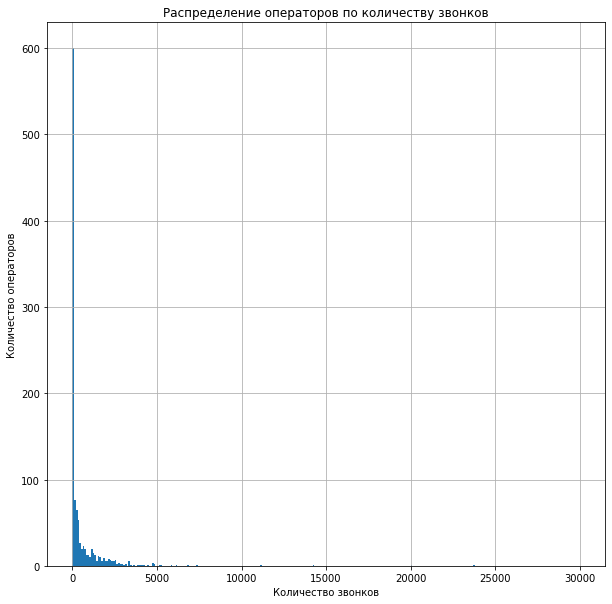

In [52]:
plt.figure(figsize=(10,10))
calls_by_operators['calls_count'].hist(bins=300, range=(0,30000))
plt.title('Распределение операторов по количеству звонков')
plt.xlabel('Количество звонков')
plt.ylabel('Количество операторов')
plt.show()

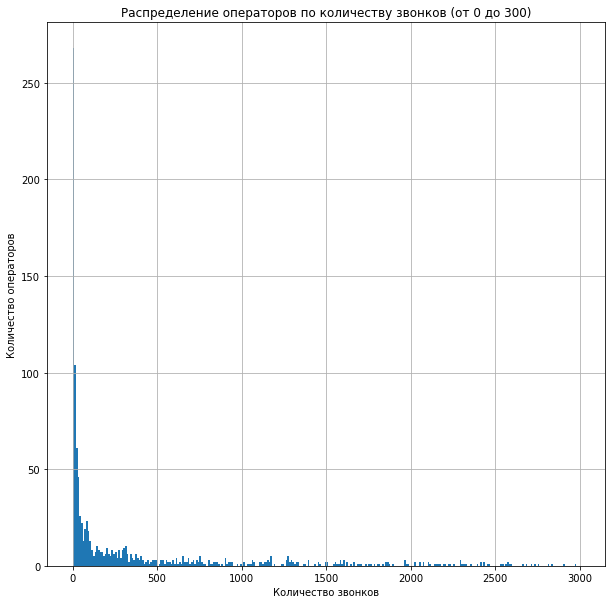

In [53]:
plt.figure(figsize=(10,10))
calls_by_operators['calls_count'].hist(bins=300, range=(0,3000))
plt.title('Распределение операторов по количеству звонков (от 0 до 300)')
plt.xlabel('Количество звонков')
plt.ylabel('Количество операторов')
plt.show()

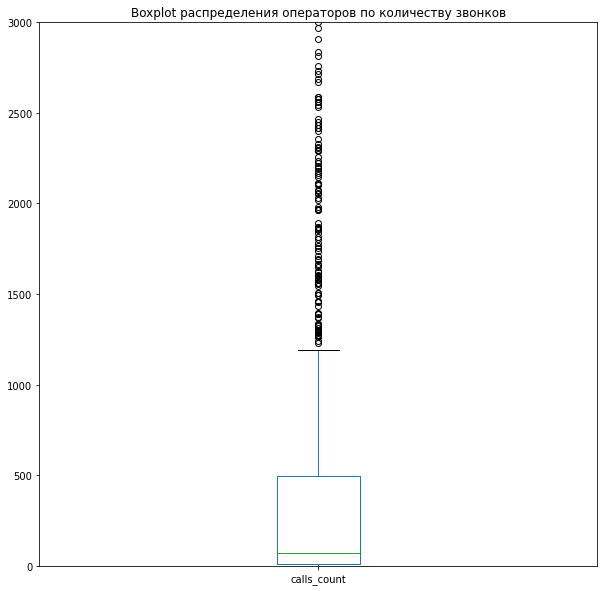

In [54]:
plt.figure(figsize=(10,10))
calls_by_operators['calls_count'].plot(kind='box')
plt.ylim(0,3000)
plt.title('Boxplot распределения операторов по количеству звонков')
plt.show()

In [55]:
calls_by_operators['calls_count'].describe()

count     1092.000000
mean       642.989927
std       2889.666021
min          1.000000
25%         10.000000
50%         72.000000
75%        493.750000
max      60221.000000
Name: calls_count, dtype: float64

Как видно на диаграммах, большинство операторов совершили за все время исследования до 500 звонков, максимум 60221.

Посмотрим, как распределено время разговоров в день по операторам 

In [56]:
duration_by_operator = data.query('operator_id >= 0 and is_missed_call == False').pivot_table(index=('user_id','operator_id','date'), values='total_call_duration', aggfunc='sum').sort_values(by='total_call_duration', ascending=False).reset_index()
duration_by_operator.head()

,user_id,operator_id,date,total_call_duration
0,166582,885876,2019-09-25 00:00:00+03:00,166908
1,166582,885876,2019-09-26 00:00:00+03:00,152217
2,166582,885876,2019-09-09 00:00:00+03:00,143712
3,166582,885876,2019-09-18 00:00:00+03:00,140263
4,166582,885876,2019-09-12 00:00:00+03:00,140240


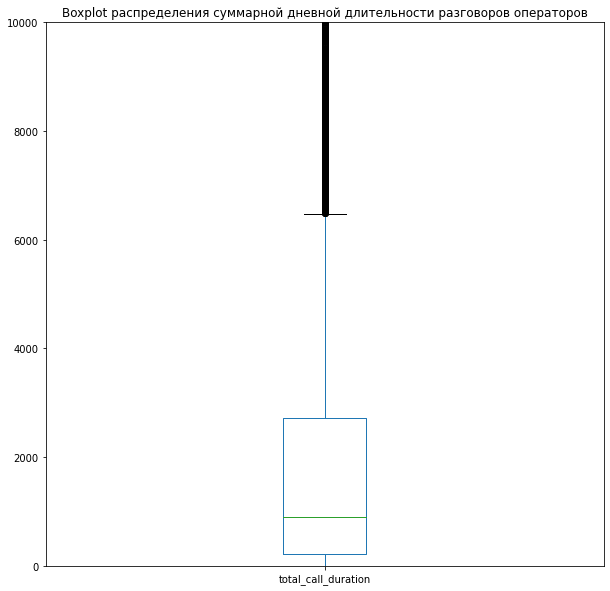

In [57]:
plt.figure(figsize=(10,10))
duration_by_operator['total_call_duration'].plot(kind='box')
plt.ylim(0,10000)
plt.title('Boxplot распределения суммарной дневной длительности разговоров операторов')
plt.show()

In [58]:
duration_by_operator['total_call_duration'].describe()

count     18882.000000
mean       2573.776348
std        6984.828170
min           3.000000
25%         222.000000
50%         891.000000
75%        2726.750000
max      166908.000000
Name: total_call_duration, dtype: float64

Медианное значение длительности разговоров в день на оператора 891 минута или 14.9 часа, но имеются операторы с длительностью более 10000 минут. Это явные аномалии. Найдем операторов, которые разговаривают более 10000 минут.

In [59]:
big_duration_operators = duration_by_operator.query('total_call_duration > 10000')
big_duration_operators

,user_id,operator_id,date,total_call_duration
0,166582,885876,2019-09-25 00:00:00+03:00,166908
1,166582,885876,2019-09-26 00:00:00+03:00,152217
2,166582,885876,2019-09-09 00:00:00+03:00,143712
3,166582,885876,2019-09-18 00:00:00+03:00,140263
4,166582,885876,2019-09-12 00:00:00+03:00,140240
...,...,...,...,...
722,168361,945322,2019-11-04 00:00:00+03:00,10037
723,168252,940588,2019-11-28 00:00:00+03:00,10035
724,167650,921318,2019-10-08 00:00:00+03:00,10024
725,168361,945280,2019-11-04 00:00:00+03:00,10011


Найдем вызовы с длительностью более 10000 мин

In [60]:
big_duration_calls = data.query('total_call_duration >= 10000')
big_duration_calls

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month,week
1104,166405,2019-10-16 00:00:00+03:00,out,False,882690,False,78,11795,13169,10,42
1189,166405,2019-10-24 00:00:00+03:00,out,False,882690,False,90,10346,12026,10,43
1206,166405,2019-10-25 00:00:00+03:00,out,False,882690,False,60,10099,11120,10,43
1259,166405,2019-10-30 00:00:00+03:00,out,False,882690,False,69,9158,10450,10,44
1317,166405,2019-11-05 00:00:00+03:00,in,False,-1,True,209,0,12359,11,45
...,...,...,...,...,...,...,...,...,...,...,...
48300,168361,2019-11-28 00:00:00+03:00,out,False,945322,False,144,7861,10920,11,48
48303,168361,2019-11-28 00:00:00+03:00,out,False,945316,False,85,11961,13366,11,48
48305,168361,2019-11-28 00:00:00+03:00,out,False,945280,False,53,9865,10755,11,48
48314,168361,2019-11-28 00:00:00+03:00,out,False,945312,False,68,10976,12301,11,48


In [61]:
print(round(len(big_duration_calls)/len(data)*100,2),'% звонков длительностью более 10000 мин.')

1.58 % звонков длительностью более 10000 мин.


Исключим такие звонки из дальнейшего исследования, т.к. это явные аномалии.

In [62]:
data_final = data.query('total_call_duration < 10000').reset_index()
data_final

,index,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month,week
0,0,166377,2019-08-04 00:00:00+03:00,in,False,-1,True,2,0,4,8,31
1,1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,8,32
2,2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,8,32
3,3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8,32
4,4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,8,32
...,...,...,...,...,...,...,...,...,...,...,...,...
48222,48997,168606,2019-11-10 00:00:00+03:00,out,True,957922,False,1,0,25,11,45
48223,48998,168606,2019-11-10 00:00:00+03:00,out,True,957922,True,1,0,38,11,45
48224,48999,168606,2019-11-11 00:00:00+03:00,out,True,957922,False,2,479,501,11,46
48225,49000,168606,2019-11-15 00:00:00+03:00,out,True,957922,False,4,3130,3190,11,46


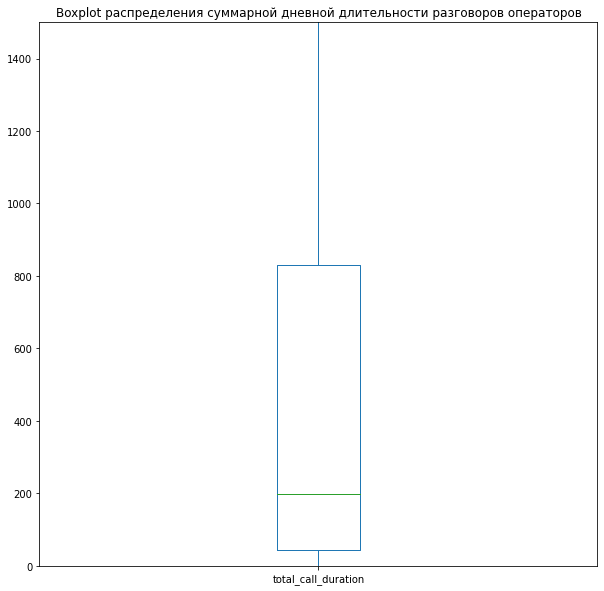

In [63]:
plt.figure(figsize=(10,10))
data_final['total_call_duration'].plot(kind='box')
plt.ylim(0,1500)
plt.title('Boxplot распределения суммарной дневной длительности разговоров операторов')
plt.show()

In [64]:
data_final['total_call_duration'].describe()

count    48227.000000
mean       786.966678
std       1417.911469
min          0.000000
25%         45.000000
50%        198.000000
75%        831.000000
max       9997.000000
Name: total_call_duration, dtype: float64

В итоговом датасете осталось 48227 строк, медианное значение длительности разговора снизилось до 198, максимальное до 9997.

### Исследование распределения пропущенных вызовов

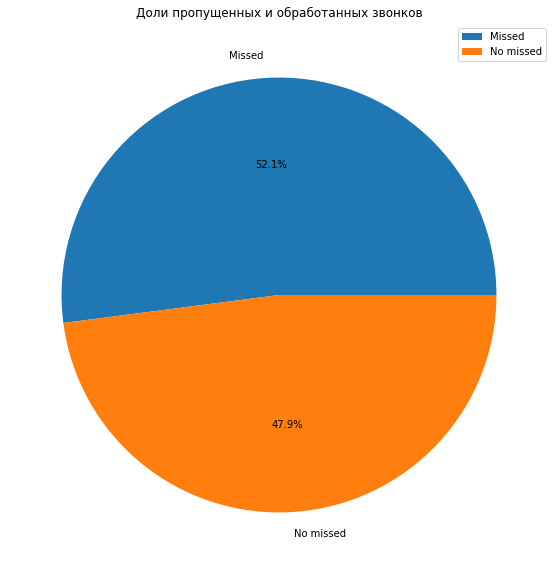

In [65]:
missed_calls = data_final.pivot_table(index=('week','is_missed_call'), values='calls_count', aggfunc='sum').reset_index()
missed_calls.loc[missed_calls['is_missed_call'] == True, 'is_missed_call'] = 'Missed'
missed_calls.loc[missed_calls['is_missed_call'] == False, 'is_missed_call'] = 'No missed'
missed_calls
missed_calls.groupby(['is_missed_call']).sum().plot(kind='pie', y='calls_count', figsize=(10, 10), autopct='%1.1f%%', ylabel = '')
plt.title('Доли пропущенных и обработанных звонков')
plt.show()

Как видно на диаграмме пропущенных вызовов 52.1 %.

### Исследование распределения длительности вызовов с учётом времени ожидания

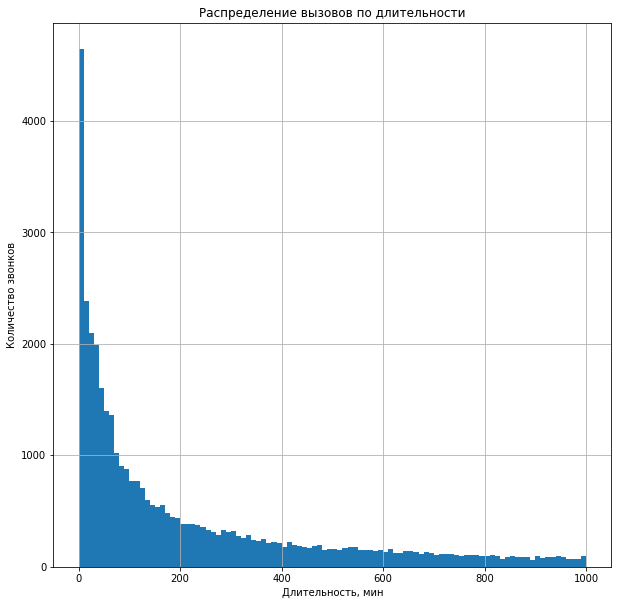

In [66]:
plt.figure(figsize=(10,10))
data_final['total_call_duration'].hist(bins=100, range=(0,1000))
plt.title('Распределение вызовов по длительности')
plt.xlabel('Длительность, мин')
plt.ylabel('Количество звонков')
plt.show()

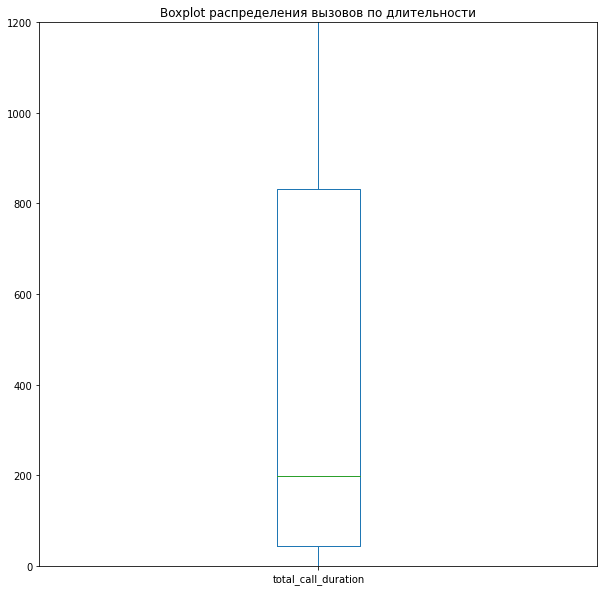

In [67]:
plt.figure(figsize=(10,10))
data_final['total_call_duration'].plot(kind='box')
plt.ylim(0,1200)
plt.title('Boxplot распределения вызовов по длительности')
plt.show()

In [68]:
data_final['total_call_duration'].describe()

count    48227.000000
mean       786.966678
std       1417.911469
min          0.000000
25%         45.000000
50%        198.000000
75%        831.000000
max       9997.000000
Name: total_call_duration, dtype: float64

Как видно на диаграмме большинство вызовов имеют длительность до 850 мин.

### Исследование распределения клиентов по тарифным планам

In [69]:
clients_by_tariff = clients.pivot_table(index=('week','tariff_plan'), values='user_id', aggfunc='nunique').reset_index()
clients_by_tariff

,week,tariff_plan,user_id
0,31,A,3
1,31,B,9
2,31,C,19
3,32,A,7
4,32,B,22
5,32,C,24
6,33,A,5
7,33,B,16
8,33,C,32
9,34,A,7


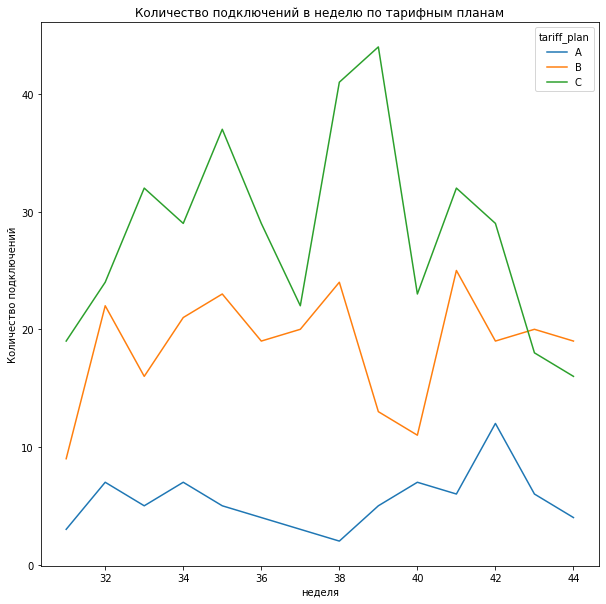

In [70]:
plt.figure(figsize=(10,10))
sns.lineplot(x='week',y='user_id', hue='tariff_plan', data=clients_by_tariff)
plt.title('Количество подключений в неделю по тарифным планам')
plt.xlabel('неделя')
plt.ylabel('Количество подключений')
plt.show()

На диаграмме видно уменьшение подключений в последний месяц на тарифном плане С, хотя на нем сначала было больше всех подключений. На тарифном плане А подключения меньше всех и после небольшого роста к 42й неделе началось снижение.

Посмотрим распределение клиентов на тарифных планах в датасете clients.

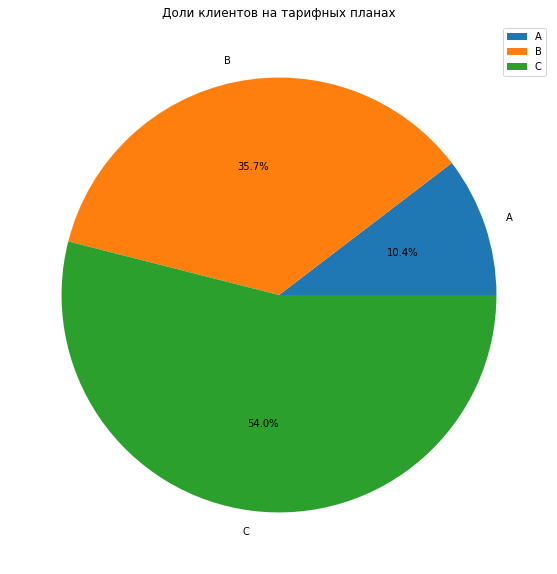

In [71]:
clients_by_tariff.groupby(['tariff_plan']).sum().plot(kind='pie', y='user_id', figsize=(10, 10), autopct='%1.1f%%', ylabel = '')
plt.title('Доли клиентов на тарифных планах')
plt.show()


In [72]:
sum_clients_by_tariff = clients_by_tariff.groupby('tariff_plan')['user_id'].sum().reset_index()
sum_clients_by_tariff = sum_clients_by_tariff.rename(columns={'user_id': 'user_sum'})
sum_clients_by_tariff

,tariff_plan,user_sum
0,A,76
1,B,261
2,C,395


Как видно на диаграмме больше всего клиентов на тарифном плане С - 54%, на тарифном плане В - 35.7% и на A - 10.4%. Нужно проверить распределение клиентов, которые совершали звонки. Для этого соединим таблицы data и clients.

In [73]:
clients_data = data_final.merge(clients, on='user_id', how='left')
clients_data.head()

,index,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month_x,week_x,tariff_plan,date_start,month_y,week_y
0,0,166377,2019-08-04 00:00:00+03:00,in,False,-1,True,2,0,4,8,31,B,2019-08-01,8,31
1,1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,8,32,B,2019-08-01,8,31
2,2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,8,32,B,2019-08-01,8,31
3,3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8,32,B,2019-08-01,8,31
4,4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,8,32,B,2019-08-01,8,31


In [74]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48227 entries, 0 to 48226
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   index                48227 non-null  int64                                
 1   user_id              48227 non-null  int64                                
 2   date                 48227 non-null  datetime64[ns, pytz.FixedOffset(180)]
 3   direction            48227 non-null  object                               
 4   internal             48227 non-null  bool                                 
 5   operator_id          48227 non-null  int64                                
 6   is_missed_call       48227 non-null  bool                                 
 7   calls_count          48227 non-null  int64                                
 8   call_duration        48227 non-null  int64                                
 9   total_

In [75]:
sum_act_clients_by_tariff = clients_data.groupby('tariff_plan').agg({'user_id':'nunique'}).reset_index()
sum_act_clients_by_tariff = sum_act_clients_by_tariff.rename(columns={'user_id': 'user_sum'})
sum_act_clients_by_tariff

,tariff_plan,user_sum
0,A,34
1,B,112
2,C,161


In [76]:
sum_act_clients_by_tariff['user_sum'].sum()
print(round(sum_act_clients_by_tariff['user_sum'].sum()/sum_clients_by_tariff['user_sum'].sum()*100,2),'% клиентов совершали звонки и перешли в новый набор.')

41.94 % клиентов совершали звонки и перешли в новый набор.


Количество строк после объединения не изменилось, пропуски отсутствуют. Количество клиентов, совершавших звонки примерно 42% от количества в файле clients.

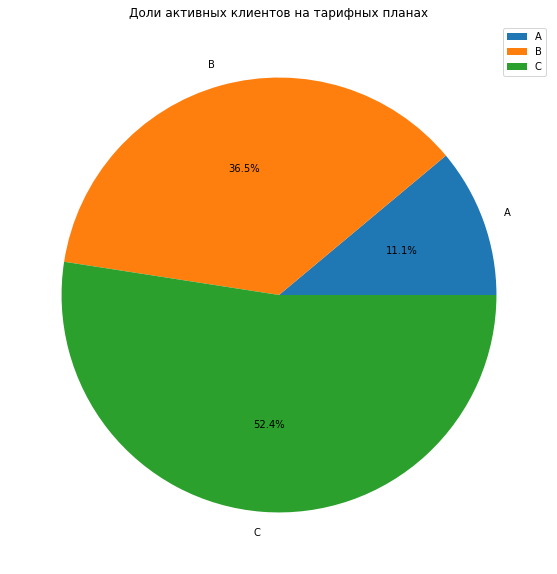

In [77]:
sum_act_clients_by_tariff.groupby(['tariff_plan']).sum().plot(kind='pie', y='user_sum', figsize=(10, 10), autopct='%1.1f%%', ylabel = '')
plt.title('Доли активных клиентов на тарифных планах')
plt.show()

Как видно из таблицы распределение по тарифным планам клиентов совершавших звонки осталось примерно таким же на тарифном плане С - 52.4%, на тарифном плане В - 36.5% и на С - 11.1%. Будем считать активными тех клиентов, которые совершали звонки в последние 2 месяца октябрь-ноябрь.

Создадим список активных клиентов.

In [78]:
active_clients = clients_data[clients_data['month_x'] >= 10]['user_id'].unique()
print('Активных клиентов',active_clients.shape[0])

Активных клиентов 295


**Выводы и наблюдения:**
* Резкий скачок количества звонков выше среднего количества произошел на 39 неделе (после 23.09.2019). Самое большое количество звонков было на 41-й и 47-й неделях. Между ними наблюдался спад с минимумами на 43-44 неделями. Исследование будем проводить по всем данным.
* Входящих звонков меньше в 3-4 раза.
* Внутренних звонков всего 1.8%.
* Большинство операторов совершили за все время исследования до 500 звонков, максимум 60221..
* Пропущенных вызовов почти 52.1 %.
* Большинство вызовов имеют длительность до 850 мин.
* Наблюдается уменьшение подключений в последний месяц на тарифном плане С, хотя на нем сначала было больше всех подключений. На тарифном плане А подключения меньше всех и после небольшого роста к 42й неделе началось снижение.
* Больше всего клиентов на тарифном плане С - 54%, на тарифном плане В - 35.7% и на A - 10.4%. 
* Распределение по тарифным планам клиентов совершавших звонки осталось примерно таким же на тарифном плане С - 52.4%, на тарифном плане В - 36.5% и на С - 11.1%. Будем считать активными тех клиентов, которые совершали звонки в последние 2 месяца октябрь-ноябрь.
* Активных клиентов 295

## Анализ экономических показателей.

### Исследование расходов клиентов на каждом из тарифов

Создаем таблицу с параметрами тарифных планов.

In [79]:
tariff_plan = pd.DataFrame({'tariff_plan':['A','B','C'],'monthly_fee':['4000','2000','1000'],'operator_fee':['50','150','300'],'bundle':['2000','500','0'], 'internal_cost':['0.1','0.15','0.3'], 'external_cost':['0.3','0.5','0.7']})
tariff_plan

,tariff_plan,monthly_fee,operator_fee,bundle,internal_cost,external_cost
0,A,4000,50,2000,0.1,0.3
1,B,2000,150,500,0.15,0.5
2,C,1000,300,0,0.3,0.7


Посчитаем ежемесячные расходы активных клиентов в исследуемом периоде по тарифам, клиентам и направлениям.

In [80]:
monthly_expenses = clients_data.query('user_id in @active_clients').groupby(['tariff_plan','user_id','month_x','internal']).agg({'total_call_duration':'sum'}).reset_index()
monthly_expenses.head(10)

,tariff_plan,user_id,month_x,internal,total_call_duration
0,A,166407,8,False,60
1,A,166407,8,True,37
2,A,166407,9,False,5957
3,A,166407,9,True,5956
4,A,166407,10,False,20147
5,A,166407,10,True,9577
6,A,166407,11,False,9940
7,A,166407,11,True,7199
8,A,166481,8,False,51
9,A,166481,9,False,15


Сделаем отдельные таблицы с длительностью внешних и внутренних звонков.

In [81]:
internal_calls = monthly_expenses.loc[monthly_expenses['internal'] == True].reset_index()
internal_calls.drop(['index','tariff_plan','internal'], axis=1, inplace=True)
internal_calls

,user_id,month_x,total_call_duration
0,166407,8,37
1,166407,9,5956
2,166407,10,9577
3,166407,11,7199
4,166541,9,2707
...,...,...,...
336,168416,11,0
337,168466,11,0
338,168598,11,17
339,168601,11,0


In [82]:
external_calls = monthly_expenses.loc[monthly_expenses['internal'] == False].reset_index()
external_calls.drop(['index','tariff_plan','internal'], axis=1, inplace=True)
external_calls

,user_id,month_x,total_call_duration
0,166407,8,60
1,166407,9,5957
2,166407,10,20147
3,166407,11,9940
4,166481,8,51
...,...,...,...
773,168575,10,2
774,168575,11,860
775,168598,11,4871
776,168601,11,42871


In [83]:
monthly_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tariff_plan          1119 non-null   object
 1   user_id              1119 non-null   int64 
 2   month_x              1119 non-null   int64 
 3   internal             1119 non-null   bool  
 4   total_call_duration  1119 non-null   int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 36.2+ KB


Посчитаем количество операторов активных клиентов.

In [84]:
monthly_operators = clients_data.query('user_id in @active_clients').groupby(['tariff_plan','user_id','month_x']).agg({'operator_id':'count'}).reset_index()
monthly_operators

,tariff_plan,user_id,month_x,operator_id
0,A,166407,8,5
1,A,166407,9,110
2,A,166407,10,180
3,A,166407,11,151
4,A,166481,8,6
...,...,...,...,...
773,C,168575,10,1
774,C,168575,11,11
775,C,168598,11,23
776,C,168601,11,69


Добавим в таблицу длительность внутренних и внешних звонков.

In [85]:
monthly_costs = monthly_operators.merge(internal_calls, on=['user_id','month_x'], how='left').reset_index()
monthly_costs = monthly_costs.rename(columns={"total_call_duration":"internal_duration"})
monthly_costs = monthly_costs.merge(external_calls, on=['user_id','month_x'], how='left').reset_index()
monthly_costs = monthly_costs.rename(columns={"total_call_duration":"external_duration"})
monthly_costs = monthly_costs.rename(columns={"operator_id":"operator_count"})
monthly_costs = monthly_costs.rename(columns={"month_x":"month"})
monthly_costs['internal_duration'] = monthly_costs['internal_duration'].fillna(0)
monthly_costs['external_duration'] = monthly_costs['external_duration'].fillna(0)
monthly_costs

,level_0,index,tariff_plan,user_id,month,operator_count,internal_duration,external_duration
0,0,0,A,166407,8,5,37.0,60
1,1,1,A,166407,9,110,5956.0,5957
2,2,2,A,166407,10,180,9577.0,20147
3,3,3,A,166407,11,151,7199.0,9940
4,4,4,A,166481,8,6,0.0,51
...,...,...,...,...,...,...,...,...
773,773,773,C,168575,10,1,0.0,2
774,774,774,C,168575,11,11,0.0,860
775,775,775,C,168598,11,23,17.0,4871
776,776,776,C,168601,11,69,0.0,42871


In [86]:
monthly_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   level_0            778 non-null    int64  
 1   index              778 non-null    int64  
 2   tariff_plan        778 non-null    object 
 3   user_id            778 non-null    int64  
 4   month              778 non-null    int64  
 5   operator_count     778 non-null    int64  
 6   internal_duration  778 non-null    float64
 7   external_duration  778 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 48.8+ KB


In [87]:
tariff_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tariff_plan    3 non-null      object
 1   monthly_fee    3 non-null      object
 2   operator_fee   3 non-null      object
 3   bundle         3 non-null      object
 4   internal_cost  3 non-null      object
 5   external_cost  3 non-null      object
dtypes: object(6)
memory usage: 272.0+ bytes


Меняем типы данных для расчетов.

In [88]:
tariff_plan['internal_cost'] = tariff_plan['internal_cost'].astype('float')
tariff_plan['external_cost'] = tariff_plan['external_cost'].astype('float')
tariff_plan['monthly_fee'] = tariff_plan['monthly_fee'].astype('int')
tariff_plan['operator_fee'] = tariff_plan['operator_fee'].astype('int')
tariff_plan['bundle'] = tariff_plan['bundle'].astype('int')
monthly_costs['internal_duration'] = monthly_costs['internal_duration'].astype('int')
monthly_costs['external_duration'] = monthly_costs['external_duration'].astype('int')

In [89]:
tariff_plan

,tariff_plan,monthly_fee,operator_fee,bundle,internal_cost,external_cost
0,A,4000,50,2000,0.10,0.3
1,B,2000,150,500,0.15,0.5
2,C,1000,300,0,0.30,0.7


In [90]:
monthly_costs.head()

,level_0,index,tariff_plan,user_id,month,operator_count,internal_duration,external_duration
0,0,0,A,166407,8,5,37,60
1,1,1,A,166407,9,110,5956,5957
2,2,2,A,166407,10,180,9577,20147
3,3,3,A,166407,11,151,7199,9940
4,4,4,A,166481,8,6,0,51


Создадим отдельные переменные с параметрами тарифных планов для расчетов.

In [91]:
monthly_fee_A = tariff_plan['monthly_fee'].loc[tariff_plan['tariff_plan']=='A']
monthly_fee_B = tariff_plan['monthly_fee'].loc[tariff_plan['tariff_plan']=='B']
monthly_fee_C = tariff_plan['monthly_fee'].loc[tariff_plan['tariff_plan']=='C']
operator_fee_A = tariff_plan['operator_fee'].loc[tariff_plan['tariff_plan']=='A']
operator_fee_B = tariff_plan['operator_fee'].loc[tariff_plan['tariff_plan']=='B']
operator_fee_C = tariff_plan['operator_fee'].loc[tariff_plan['tariff_plan']=='C']
bundle_A = tariff_plan['bundle'].loc[tariff_plan['tariff_plan']=='A']
bundle_B = tariff_plan['bundle'].loc[tariff_plan['tariff_plan']=='B']
bundle_C = tariff_plan['bundle'].loc[tariff_plan['tariff_plan']=='C']
internal_cost_A = tariff_plan['internal_cost'].loc[tariff_plan['tariff_plan']=='A']
internal_cost_B = tariff_plan['internal_cost'].loc[tariff_plan['tariff_plan']=='B']
internal_cost_C = tariff_plan['internal_cost'].loc[tariff_plan['tariff_plan']=='C']
external_cost_A = tariff_plan['external_cost'].loc[tariff_plan['tariff_plan']=='A']
external_cost_B = tariff_plan['external_cost'].loc[tariff_plan['tariff_plan']=='B']
external_cost_C = tariff_plan['external_cost'].loc[tariff_plan['tariff_plan']=='C']

Создадим функции для расчетов стоимости услуг на всех тарифах.

In [92]:
def calc_cost_A(monthly_costs):
    if monthly_costs['internal_duration']>2000:
        calc_cost_A = (monthly_costs['internal_duration']-bundle_A)*internal_cost_A+monthly_costs['operator_count']*operator_fee_A+monthly_fee_A
    else:
        calc_cost_A = monthly_costs['operator_count']*operator_fee_A+monthly_fee_A
    return calc_cost_A

In [93]:
def calc_cost_B(monthly_costs):
    if monthly_costs['internal_duration']>500:
        calc_cost_B = (monthly_costs['internal_duration']-bundle_B)*internal_cost_B+monthly_costs['operator_count']*operator_fee_B+monthly_fee_B
    else:
        calc_cost_B = monthly_costs['operator_count']*operator_fee_B+monthly_fee_B
    return calc_cost_B

In [94]:
def calc_cost_C(monthly_costs):
    if monthly_costs['operator_count']>0:
        calc_cost_C = monthly_costs['operator_count']*operator_fee_C+monthly_fee_C
    else:
        calc_cost_C = monthly_fee_C
    return calc_cost_C

In [95]:
monthly_costs['calc_cost_A'] = monthly_costs.apply(calc_cost_A, axis=1)
monthly_costs['calc_cost_B'] = monthly_costs.apply(calc_cost_B, axis=1)
monthly_costs['calc_cost_C'] = monthly_costs.apply(calc_cost_C, axis=1)

In [96]:
monthly_costs.head()

,level_0,index,tariff_plan,user_id,month,operator_count,internal_duration,external_duration,calc_cost_A,calc_cost_B,calc_cost_C
0,0,0,A,166407,8,5,37,60,4250.0,2750.00,2500
1,1,1,A,166407,9,110,5956,5957,9895.6,19318.40,34000
2,2,2,A,166407,10,180,9577,20147,13757.7,30361.55,55000
3,3,3,A,166407,11,151,7199,9940,12069.9,25654.85,46300
4,4,4,A,166481,8,6,0,51,4300.0,2900.00,2800


Найдем стоимость текущего тарифа.

In [97]:
def current_cost(monthly_costs):
    if monthly_costs['tariff_plan']=='A':
        return monthly_costs['calc_cost_A']
    if monthly_costs['tariff_plan']=='B':
        return monthly_costs['calc_cost_B']
    if monthly_costs['tariff_plan']=='C':
        return monthly_costs['calc_cost_C']

In [98]:
monthly_costs['current_cost'] = monthly_costs.apply(current_cost, axis=1)

In [99]:
monthly_costs.head()

,level_0,index,tariff_plan,user_id,month,operator_count,internal_duration,external_duration,calc_cost_A,calc_cost_B,calc_cost_C,current_cost
0,0,0,A,166407,8,5,37,60,4250.0,2750.00,2500,4250.0
1,1,1,A,166407,9,110,5956,5957,9895.6,19318.40,34000,9895.6
2,2,2,A,166407,10,180,9577,20147,13757.7,30361.55,55000,13757.7
3,3,3,A,166407,11,151,7199,9940,12069.9,25654.85,46300,12069.9
4,4,4,A,166481,8,6,0,51,4300.0,2900.00,2800,4300.0


Найдем тарифный план с минимальными затратами.

In [100]:
monthly_costs['min_cost'] = monthly_costs[['calc_cost_A', 'calc_cost_B', 'calc_cost_C']].min(axis=1)

In [101]:
monthly_costs.head()

,level_0,index,tariff_plan,user_id,month,operator_count,internal_duration,external_duration,calc_cost_A,calc_cost_B,calc_cost_C,current_cost,min_cost
0,0,0,A,166407,8,5,37,60,4250.0,2750.00,2500,4250.0,2500.0
1,1,1,A,166407,9,110,5956,5957,9895.6,19318.40,34000,9895.6,9895.6
2,2,2,A,166407,10,180,9577,20147,13757.7,30361.55,55000,13757.7,13757.7
3,3,3,A,166407,11,151,7199,9940,12069.9,25654.85,46300,12069.9,12069.9
4,4,4,A,166481,8,6,0,51,4300.0,2900.00,2800,4300.0,2800.0


Посчитаем средние ежемечные затраты на одного клиента

In [102]:
monthly_costs_by_month = monthly_costs.groupby(['tariff_plan','month']).agg({'current_cost':'sum','user_id':'nunique'}).reset_index()
monthly_costs_by_month = monthly_costs_by_month.rename(columns={"user_id":"user_count"})
monthly_costs_by_month['arpu'] = round(monthly_costs_by_month['current_cost']/monthly_costs_by_month['user_count'],2)
monthly_costs_by_month

,tariff_plan,month,current_cost,user_count,arpu
0,A,8,55700.00,11,5063.64
1,A,9,134825.70,19,7096.09
2,A,10,360809.30,33,10933.62
3,A,11,496326.80,30,16544.23
4,B,8,226057.00,32,7064.28
5,B,9,602091.65,61,9870.35
6,B,10,1061972.05,92,11543.17
7,B,11,1264209.75,96,13168.85
8,C,8,163800.00,36,4550.00
9,C,9,1180600.00,85,13889.41


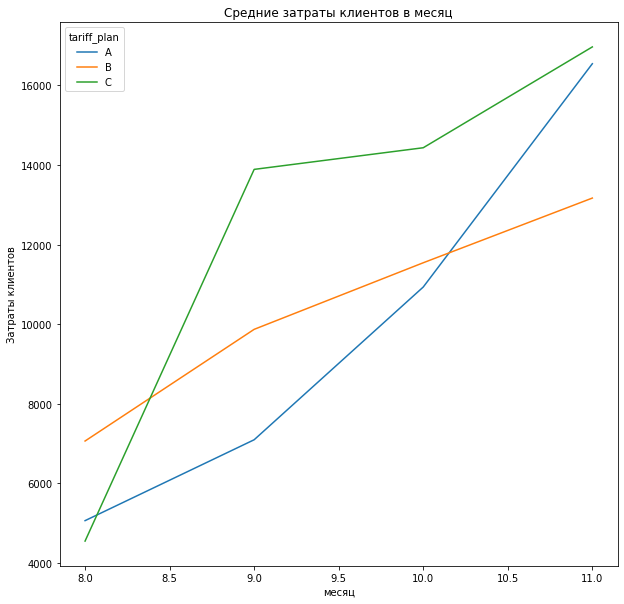

In [103]:
plt.figure(figsize=(10,10))
sns.lineplot(x='month',y='arpu', hue='tariff_plan', data=monthly_costs_by_month)
plt.title('Средние затраты клиентов в месяц')
plt.xlabel('месяц')
plt.ylabel('Затраты клиентов')
plt.show()

Самые высокие средние затраты за месяц на тарифе C, на тарифе A расходы были самые маленькие, но в последнем месяце повысились почти до уровня расходов на тарифе С.

Найдем распределение выручки по тарифам.

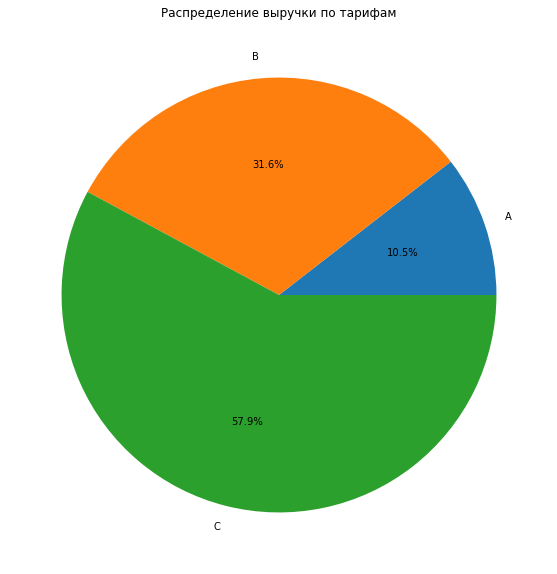

In [104]:
monthly_costs.groupby('tariff_plan')['current_cost'].sum().plot(kind='pie', y='current_cost', figsize=(10, 10), autopct='%1.1f%%', ylabel = '')
plt.title('Распределение выручки по тарифам')
plt.show()

In [105]:
monthly_costs.groupby('tariff_plan')['current_cost'].sum()

tariff_plan
A    1047661.80
B    3154330.45
C    5771000.00
Name: current_cost, dtype: float64

Создадим датафрейм с клиентами, у которых неоптимальный тарифный план.

In [106]:
non_optimal_tariff = monthly_costs[monthly_costs['current_cost']>monthly_costs['min_cost']]

In [107]:
non_optimal_tariff

,level_0,index,tariff_plan,user_id,month,operator_count,internal_duration,external_duration,calc_cost_A,calc_cost_B,calc_cost_C,current_cost,min_cost
0,0,0,A,166407,8,5,37,60,4250.0,2750.0,2500,4250.0,2500.0
4,4,4,A,166481,8,6,0,51,4300.0,2900.0,2800,4300.0,2800.0
5,5,5,A,166481,9,3,0,15,4150.0,2450.0,1900,4150.0,1900.0
6,6,6,A,166481,10,1,0,2,4050.0,2150.0,1300,4050.0,1300.0
15,15,15,A,166609,9,9,0,111,4450.0,3350.0,3700,4450.0,3350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,770,770,C,168473,11,15,0,865,4750.0,4250.0,5500,5500.0,4250.0
774,774,774,C,168575,11,11,0,860,4550.0,3650.0,4300,4300.0,3650.0
775,775,775,C,168598,11,23,17,4871,5150.0,5450.0,7900,7900.0,5150.0
776,776,776,C,168601,11,69,0,42871,7450.0,12350.0,21700,21700.0,7450.0


### Исследование клиентов с неоптимальными тарифными планами.

Добавим в таблицу столбец с разницей текущих расходов и расходов на оптимальном тарифе.

In [108]:
pd.options.mode.chained_assignment = None
non_optimal_tariff['difference'] = non_optimal_tariff['current_cost'] - non_optimal_tariff['min_cost']
non_optimal_tariff

,level_0,index,tariff_plan,user_id,month,operator_count,internal_duration,external_duration,calc_cost_A,calc_cost_B,calc_cost_C,current_cost,min_cost,difference
0,0,0,A,166407,8,5,37,60,4250.0,2750.0,2500,4250.0,2500.0,1750.0
4,4,4,A,166481,8,6,0,51,4300.0,2900.0,2800,4300.0,2800.0,1500.0
5,5,5,A,166481,9,3,0,15,4150.0,2450.0,1900,4150.0,1900.0,2250.0
6,6,6,A,166481,10,1,0,2,4050.0,2150.0,1300,4050.0,1300.0,2750.0
15,15,15,A,166609,9,9,0,111,4450.0,3350.0,3700,4450.0,3350.0,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,770,770,C,168473,11,15,0,865,4750.0,4250.0,5500,5500.0,4250.0,1250.0
774,774,774,C,168575,11,11,0,860,4550.0,3650.0,4300,4300.0,3650.0,650.0
775,775,775,C,168598,11,23,17,4871,5150.0,5450.0,7900,7900.0,5150.0,2750.0
776,776,776,C,168601,11,69,0,42871,7450.0,12350.0,21700,21700.0,7450.0,14250.0


In [109]:
print('Количество клиентов с неоптимальными тарифами',non_optimal_tariff['user_id'].nunique())

Количество клиентов с неоптимальными тарифами 248


Посчитаем суммарную и среднюю разницу.

In [110]:
print('Суммарная разница текущих затрат и затрат на оптимальном тарифе составляет ',non_optimal_tariff['difference'].sum())

Суммарная разница текущих затрат и затрат на оптимальном тарифе составляет  4968060.2


In [111]:
print('Средняя экономия на клиента составляет', round(non_optimal_tariff['difference'].mean(),2))

Средняя экономия на клиента составляет 9286.09


Посчитаем текущие суммарные и средние затраты.

In [112]:
print('Текущие суммарные затраты составляют ',round(monthly_costs['current_cost'].sum(),2))

Текущие суммарные затраты составляют  9972992.25


In [113]:
print('Экономия составит ',round(non_optimal_tariff['difference'].sum()/monthly_costs['current_cost'].sum(),2)*100,'%')

Экономия составит  50.0 %


**Выводы и наблюдения:**
* Самый доходный тариф С с доходом 5771000, самый низкодоходный А с доходом 1047661.80. На тарифе И доход составил 3154330.45.
* Самые высокие средние затраты за месяц на тарифе C, на тарифе A расходы были самые маленькие, но в последнем месяце повысились почти до уровня расходов на тарифе С.
* Суммарная разница текущих затрат и затрат на оптимальном тарифе составляет  4968060.2.
* Количество клиентов с неоптимальными тарифами 248
* Средняя экономия на оптимальном тарифе на клиента составит 9286.09
* Текущие суммарные затраты составляют  9972992.25
* Потери заказчика при смене тарифных планов на более оптимальные составят 50%.

## Проверка статистических гипотез

### Проверка гипотезы: затраты клиентов различаются на тарифных планах A и B.

Выдвигаем гипотезы:

H0: затраты клиентов одинаковые на тарифных планах А и В.

H1: затраты клиентов различаются на тарифных планах А и В.

Посмотрим на распределение выборки.

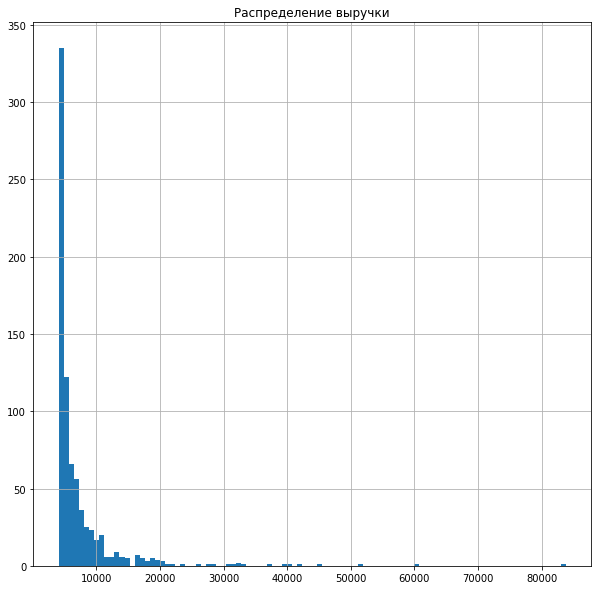

In [114]:
plt.figure(figsize=(10,10))
monthly_costs['calc_cost_A'].hist(bins=100)
plt.title('Распределение выручки')
plt.show()

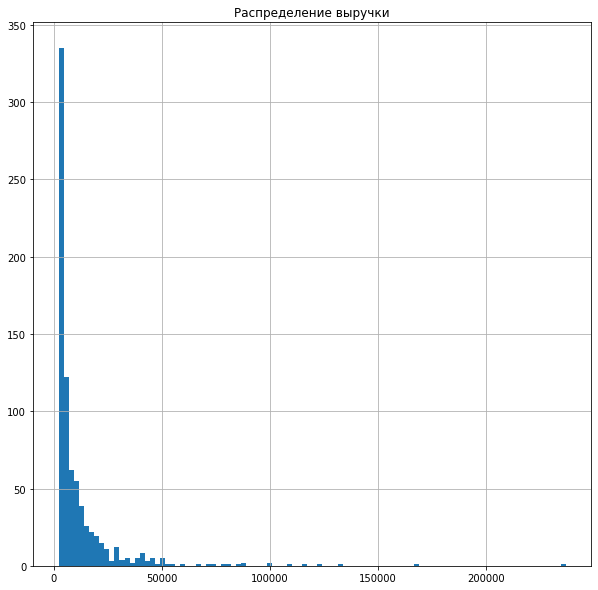

In [115]:
plt.figure(figsize=(10,10))
monthly_costs['calc_cost_B'].hist(bins=100)
plt.title('Распределение выручки')
plt.show()

Судя по диаграммам нельзя сказать, что распределение является нормальным. Будем использовать для проверки гипотез метод Манна-Уитни.

In [116]:
results = stats.mannwhitneyu(monthly_costs['calc_cost_A'],monthly_costs['calc_cost_B'])
alpha = 0.05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нельзя отвергнуть нулевую гипотезу')

p-значение: 0.04694245294574629
Отвергаем нулевую гипотезу


Вывод: затраты клиентов различаются на тарифных планах А и В.

### Проверка гипотезы: Доходы заказчика изменятся при переводе клиентов на оптимальные тарифные планы.

Выдвигаем гипотезы:

H0: доходы заказчика не изменятся при переводе клиентов на оптимальные тарифные планы.

H1: доходы заказчика изменятся при переводе клиентов на оптимальные тарифные планы.

Посмотрим на распределение выборки.

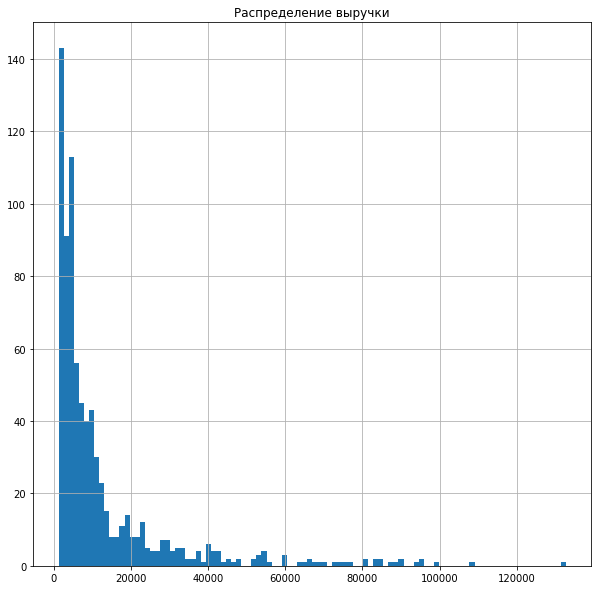

In [117]:
plt.figure(figsize=(10,10))
monthly_costs['current_cost'].hist(bins=100)
plt.title('Распределение выручки')
plt.show()

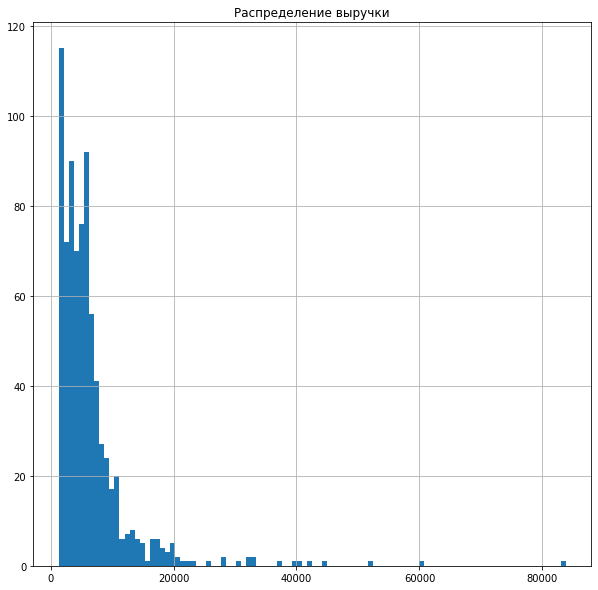

In [118]:
plt.figure(figsize=(10,10))
monthly_costs['min_cost'].hist(bins=100)
plt.title('Распределение выручки')
plt.show()

Судя по диаграммам нельзя сказать, что распределение является нормальным. Будем использовать для проверки гипотез метод Манна-Уитни.

In [119]:
results = stats.mannwhitneyu(monthly_costs['current_cost'],monthly_costs['min_cost'])
alpha = 0.05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нельзя отвергнуть нулевую гипотезу')

p-значение: 8.836133873293984e-12
Отвергаем нулевую гипотезу


Вывод: доходы заказчика изменятся при переводе клиентов на оптимальные тарифные планы.

## Выводы и рекомендации

**Выводы по предобработке данных:**

* Были изучены данные в датасетах telecom_clients.csv и telecom_dataset.csv. Количество строк в telecom_dataset.csv 53902, в telecom_clients.csv 732.
* В датасете telecom_dataset.csv были обнаружены пропуски в столбцах 'operator_id' и 'internal'.
* В столбце "operator_id" 8172 пропуска или 15.2% от количества строк. Определить корректные значения не представляется * возможным, поэтому принято решение заменить пропуски на '-1'.
* В столбце "internal" 117 пропусков. Определить корректные значения не представляется возможным, поэтому принято решение заменить пропуски на 'unknown'.
* Тип данных столбца 'date_start' был замен на временной.
* Тип данных столбца 'date' был замен на временной.
* Тип данных столбца 'operator_id' был заменен на целочисленный.
* Тип данных столбца 'internal' был замен на логический.
* В датасете telecom_dataset.csv было обнаружено и удалено 4900 дубликатов. После удаления осталось 49002 строки.
* В датасете telecom_dataset.csv находятся данные за период с 2019-08-02 по 2019-11-28.
* В датасете clients_dataset.csv находятся данные за период с 2019-08-01 по 2019-10-31.

**Выводы по исследовательскому анализу данных:**
* Резкий скачок количества звонков выше среднего количества произошел на 39 неделе (после 23.09.2019). Самое большое количество звонков было на 41-й и 47-й неделях. Между ними наблюдался спад с минимумами на 43-44 неделями. Исследование будем проводить по всем данным.
* Входящих звонков меньше в 3-4 раза.
* Внутренних звонков всего 1.8%.
* Большинство операторов совершили за все время исследования до 500 звонков, максимум 60221..
* Пропущенных вызовов почти 52.1 %.
* Большинство вызовов имеют длительность до 850 мин.
* Наблюдается уменьшение подключений в последний месяц на тарифном плане С, хотя на нем сначала было больше всех подключений. На тарифном плане А подключения меньше всех и после небольшого роста к 42й неделе началось снижение.
* Больше всего клиентов на тарифном плане С - 54%, на тарифном плане В - 35.7% и на A - 10.4%. 
* Распределение по тарифным планам клиентов совершавших звонки осталось примерно таким же на тарифном плане С - 52.4%, на тарифном плане В - 36.5% и на С - 11.1%. Будем считать активными тех клиентов, которые совершали звонки в последние 2 месяца октябрь-ноябрь.
* Активных клиентов 295
**Выводы по анализу экономических показателей:**
* Самый доходный тариф С с доходом 5771000, самый низкодоходный А с доходом 1047661.80. На тарифе И доход составил 3154330.45.
* Самые высокие средние затраты за месяц на тарифе C, на тарифе A расходы были самые маленькие, но в последнем месяце повысились почти до уровня расходов на тарифе С.
* Суммарная разница текущих затрат и затрат на оптимальном тарифе составляет  4968060.2.
* Количество клиентов с неоптимальными тарифами 248
* Средняя экономия на оптимальном тарифе на клиента составит 9286.09
* Текущие суммарные затраты составляют  9972992.25
* Потери заказчика при смене тарифных планов на более оптимальные составят 50%.

**Выводы по проверке гипотез:**
* Затраты клиентов различаются на тарифных планах А и В.
* Доходы заказчика изменятся при переводе клиентов на оптимальные тарифные планы.

**Рекомендации:**


Самый большой доход приносят клиенты на тарифе С, на нем и самое большое количество клиентов. В последнее время наблюдается увеличение доходов на тарифе А. Наблюдается уменьшение клиентов на тарифе С. Если клиентам предложить переход на оптимальные тарифы доходы заказчика сильно уменьшатся на 50%. Поэтому можно рекомендовать не проводить массовую смену тарифных планов, а работать индивидуально с каждым клиентом.

Ссылка на презентацию: https://disk.yandex.ru/i/I9WdHu8a-3LTMA